In [91]:
# !pip install git+https://github.com/KindXiaoming/pykan.git

In [92]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
dataset = {}
X_train = pd.read_csv('../Files/Standardization/X_Train.csv')
y_train = pd.read_csv('../Files/y_train.csv')
X_test = pd.read_csv('../Files/Standardization/X_Test.csv')
y_test = pd.read_csv('../Files/y_test.csv')

In [94]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
y_train['Gender']= label_encoder.fit_transform(y_train['Gender']) 
y_test['Gender']= label_encoder.fit_transform(y_test['Gender']) 

In [95]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [96]:
y_train = y_train.Gender
y_test = y_test.Gender
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [97]:

dataset['train_input'] = torch.from_numpy(X_train)
dataset['test_input'] = torch.from_numpy(X_test)
dataset['train_label'] = torch.from_numpy(y_train).view(-1, 1)
dataset['test_label'] = torch.from_numpy(y_test).view(-1, 1)


In [98]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(856, 39) (856,) (129, 39) (129,)


In [99]:
from kan import *

In [100]:
model = KAN(width = [39, 5, 1], grid = 5, k = 3, seed = 0)

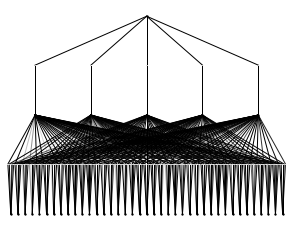

In [101]:
model(dataset['train_input'])
model.plot(beta=100)

In [102]:
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())
def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())

In [103]:
results = model.train(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), lamb=0.01, lamb_entropy=10.)
results['train_acc'][-1], results['test_acc'][-1]

train loss: 3.47e-01 | test loss: 3.94e-01 | reg: 6.25e+01 : 100%|██| 20/20 [00:37<00:00,  1.87s/it]


(0.836448609828949, 0.8139534592628479)

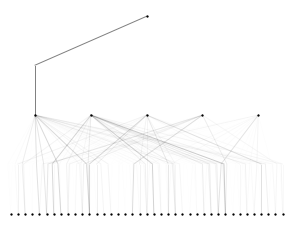

In [104]:
model.plot()

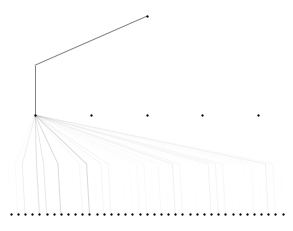

In [105]:
model.prune()
model.plot(mask=True)

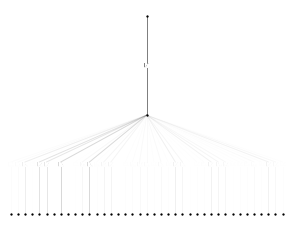

In [106]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [107]:
results = model.train(dataset, opt = "LBFGS", steps = 100, metrics=(train_acc, test_acc))
results['train_acc'][-1], results['test_acc'][-1]


train loss: 1.15e-01 | test loss: 5.36e-01 | reg: 1.79e+01 : 100%|█| 100/100 [00:43<00:00,  2.32it/s


(0.9894859790802002, 0.713178277015686)

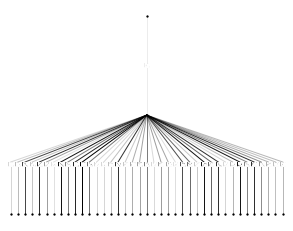

In [108]:
model.plot()